### Exercise 1

Use webscrabing to retrieve the table data from https://www.worldometers.info/coronavirus/ and create a pandas DataFrame to show the data.

In [31]:
import bs4
import requests
import pandas as pd
import numpy as np

r = requests.get('https://www.worldometers.info/coronavirus/')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')

columns = []
data = []

for header in soup.find_all('th'):
    columns.append(header.getText()) 

for table_data in soup.find_all('td'):
    data.append(table_data.getText())


cities_tag_np_2d = np.reshape(data,(int(len(data)/9),9))
df = pd.DataFrame(data=cities_tag_np_2d, columns=columns[0:9])
df
        


,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,"81,008",+41,"3,255",+7,"71,740","6,013","1,927",56
1,Italy,"47,021",,"4,032",,"5,129","37,860","2,655",778
2,Spain,"21,571",,"1,093",,"1,588","18,890",939,461
3,Iran,"20,610",+966,"1,556",+123,"7,635","11,419",,245
4,Germany,"20,099",+251,70,+2,180,"19,849",2,240
...,...,...,...,...,...,...,...,...,...
370,Sint Maarten,1,,,,,1,,23
371,Somalia,1,,,,,1,,0.06
372,Eswatini,1,,,,,1,,0.9
373,Zimbabwe,1,+1,,,,1,,0.07


Clean Up the data by removing the '+' symbol from colums "NewDeaths" and "NewCases"

HINT!! Be VERY observant in reguards to the amount of whitespace

In [23]:
filter = df["NewCases"] != " "
dfNew = df[filter]

newcases = dfNew["NewCases"] 
newcases = dfNew["NewCases"].str.slice(2,-1)

dfNew["NewDeaths"] = dfNew["NewDeaths"].str.slice(1,-1)

dfNew.replace(" ", "0", inplace=True)
dfNew.replace("", "0", inplace=True)

dfNew.head(30)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,"81,008",+41,"3,255",0,"71,740","6,013","1,927",56
1,Italy,"47,021",0,"4,032",0,"5,129","37,860","2,655",778
2,Spain,"21,571",0,"1,093",0,"1,588","18,890",939,461
3,Iran,"20,610",+966,"1,556",12,"7,635","11,419",0,245
4,Germany,"20,099",+251,70,0,180,"19,849",2,240
5,USA,"19,774",+391,275,1,147,"19,352",64,60
6,France,"12,612",0,450,0,"1,587","10,575","1,297",193
7,S. Korea,"8,799",+147,102,0,"2,612","6,085",59,172
8,Switzerland,"5,616",+1,57,0,15,"5,544",141,649
9,UK,"3,983",0,177,0,65,"3,741",20,59


Create a bar plot which shows the number of TotalCases in each country (remember to leave out the total row)

Hint! the numbers should be stripped from spacing and thousand separators should be removed

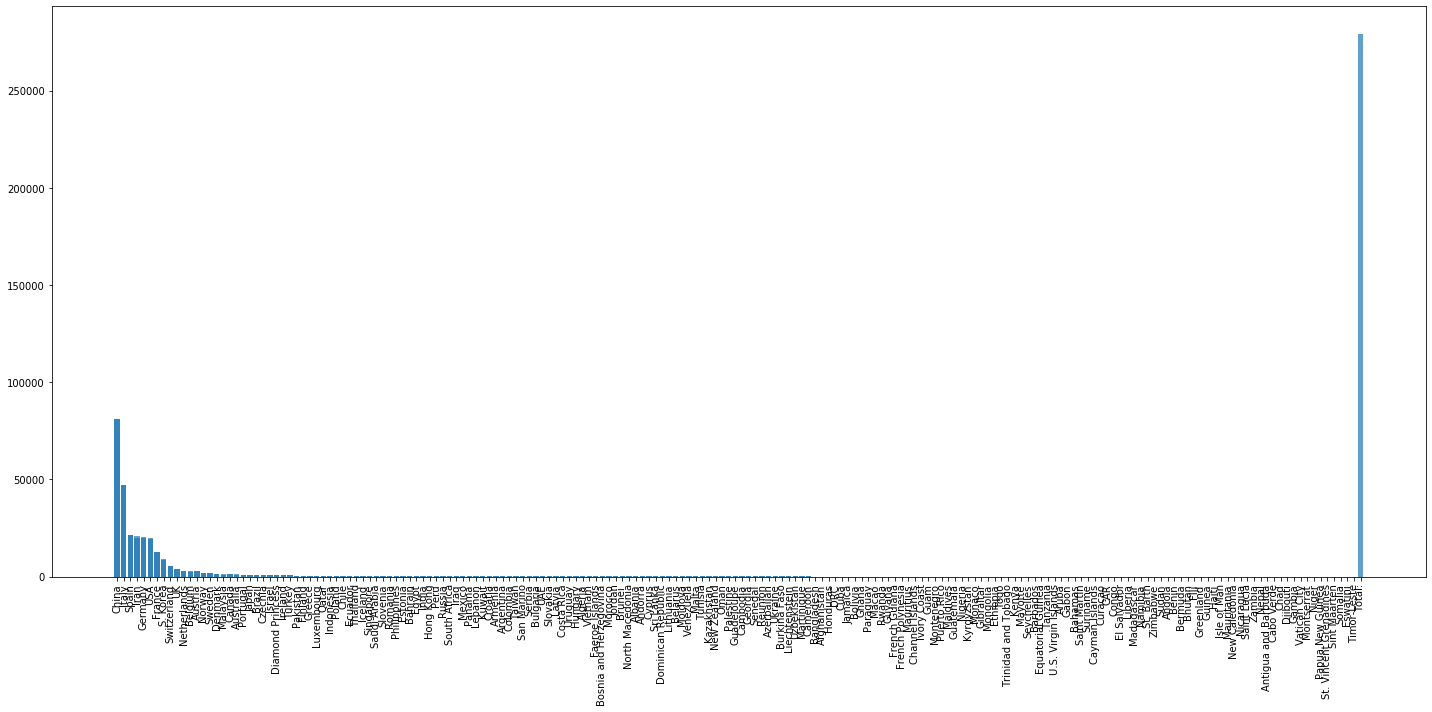

In [27]:
import matplotlib.pyplot as plt
import numpy as np

countries = list(dfNew['Country,Other'])
cases = list(dfNew['TotalCases'])

cases = [int(i.strip().replace(",","")) for i in cases] 

# Removing the total row in the end
countries.pop()
cases.pop()

plt.figure(figsize=(20,10))
plt.bar(countries, cases, width=0.8, align='center',alpha=0.7)
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tight_layout()

plt.show()